# OPTIMAL DEPTH FOR DIFFERENT LAYERS

In [22]:
import os
import numpy as np
import re
from matplotlib import pyplot as plt

In [28]:
ids = []
for filename in os.listdir("../depth_test"):
    pattern = re.compile(r"sub(\d+)layer(\d+)depth(\d+)\.npy")
    match = pattern.match(filename).groups()
    match = [int(e) for e in match]
    ids.append(match)
ids = np.array(ids)

def open_result(sub_num, layer_num, depth):
    name = f'../depth_test/sub{sub_num}layer{layer_num}depth{depth}.npy'
    array = np.load(name)
    return array

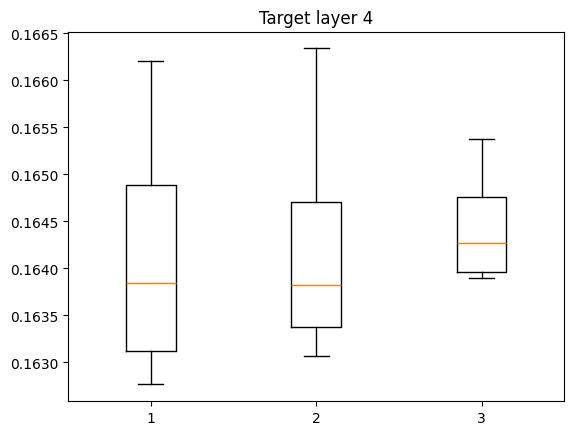

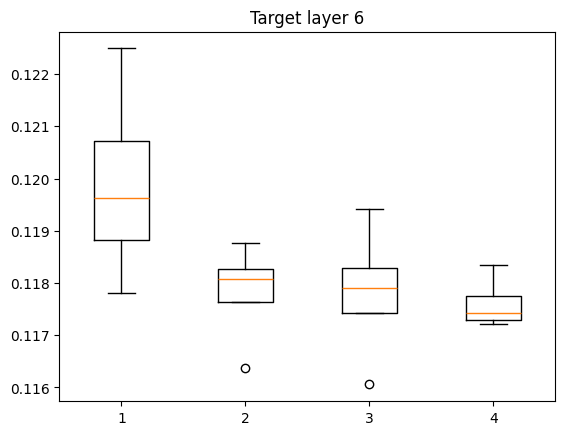

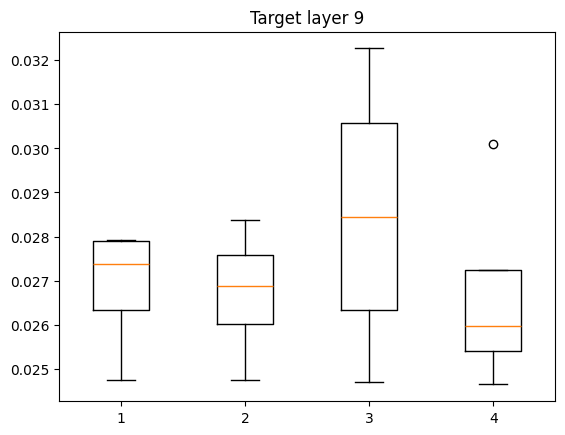

In [27]:
for layer_num in [4, 6, 9]:
    layer_losses = []
    for depth in range(min(4, layer_num-1)):
        min_losses = []
        for sub_num in range(1, 5):
            val_losses = open_result(sub_num, layer_num, depth)
            min_losses.append(min(val_losses))
        layer_losses.append(np.array(min_losses))
    plt.boxplot(layer_losses)
    plt.title(f'Target layer {layer_num}')
    plt.show()
            